**This is the first part of the module 6 assignment. The full module 6 assignment will be due on Friday, April 22 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas.** 

**In this assignment, you'll code the 2D Ising model and explore the system behavior as a function of parameters**

**0. List the names of your group members, as well as any other class members you conferred with for this assignment.**

> Rex Xu, Carl Li, and Zee Kwong

**1. Write a function that simulates the 2D Ising model on a square lattice and uses periodic boundary conditions. Rather than ```if``` statements, use the built-in modulus function to deal with periodic boundary conditions. Your function should have inputs for the parameters listed below, and it should use the Metropolis algorithm to update spin values. Your code should output the 2D spin configuration for each time step and the average magnetization per spin as a function of time.**

$N = $ number of spins

$J = $ the coupling/interaction strength

$h = $ the external field strength

$T = $ temperature

$t = $ number of iterations

In [ ]:
import numpy as np
import numpy.random as nprnd
import matplotlib.pyplot as plt

In [ ]:
def Ising2D(N, J, h, T, t):
  # N = number of spins
  # J = coupling
  # h = external field
  # T = temperature
  # t = number of iterations
  spinAngles = 2*nprnd.randint(0,2,size=(N,N))-1
  mat = np.zeros([t, N, N])
  avgMag = np.zeros([t])

  for iter in range(t):
    for k in range(N):
      for l in range(N):
        i = nprnd.randint(0, N) # pick a spin at random
        j = nprnd.randint(0, N)

        low_i = (i - 1) % N
        high_i = (i + 1) % N

        low_j = (j - 1) % N
        high_j = (j + 1) % N

        # calculate energy of the current state
        currentSpinAngle = spinAngles[i,j]

        # neighboring spins
        leftSpinAngle = spinAngles[low_i,j]
        rightSpinAngle = spinAngles[high_i,j]
        upSpinAngle = spinAngles[i,low_j]
        downSpinAngle = spinAngles[i,high_j]

        Eij = -J*currentSpinAngle * (leftSpinAngle + rightSpinAngle + upSpinAngle + downSpinAngle) - h*currentSpinAngle

        Eij_flip = -J*(-currentSpinAngle) * (leftSpinAngle + rightSpinAngle + upSpinAngle + downSpinAngle) - h*(-currentSpinAngle)
        
        # calculate the energy difference
        deltaE = Eij_flip - Eij

        # decide whether to flip the spin
        if deltaE < 0:
          spinAngles[i,j] = -currentSpinAngle
        else:
          prob = np.exp(-deltaE/T)
          rn = nprnd.rand(1)
          if rn < prob:
            spinAngles[i,j] = -currentSpinAngle

    mat[iter:, :,:] = spinAngles
    avgMag[iter] = np.abs(np.mean(mat[iter:, :, :]))

  return mat, avgMag

**(a) Run your code using the parameter sets listed below, saving the outputs from each.**

$N = 50$ 

$J = 1$

$h = 0$

$T = 0.001$

$t = 500$

**and**

$N = 50$ 

$J = 1$

$h = 0$

$T = 1000$

$t = 500$

**Plot the average magnetizations per spin for each simulation on the same axes and include a legend and axis labels. Using the colab notebook from class this week, create animations (using every 5th frame) for each system. Describe the observed behaviors, and how they correspond to features in the plots.**

In [ ]:
N = 50
J = 1
h = 0
T = 0.001
t = 500
mat1, am1 = Ising2D(N, J, h, T, t)

N = 50
J = 1
h = 0
T = 1000
t = 500
mat2, am2 = Ising2D(N, J, h, T, t)

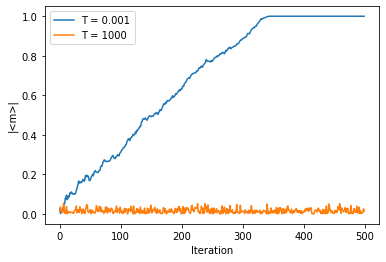

In [ ]:
fig, ax = plt.subplots(1, 1)
time = np.arange(0, t)
ax.plot(time, am1, label="T = 0.001")
ax.plot(time, am2, label="T = 1000")

ax.set(xlabel = "Iteration", ylabel = "|<m>|")
ax.legend()
plt.show()

Average magnetization converges to a value after some iterations for t=0.001 compared to t=1000 which appears noisy.

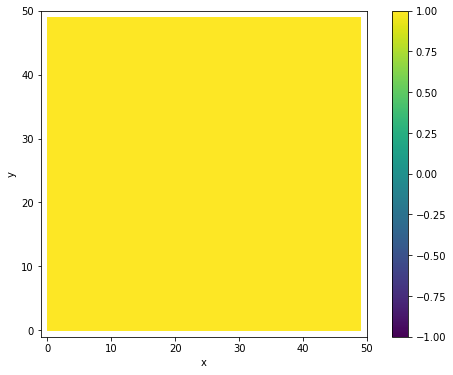

In [ ]:
# animation of angles

import matplotlib.animation as animation
from IPython.display import HTML

x = np.arange(0,N)
y = np.arange(0,N)

fig,ax = plt.subplots(figsize=(9,6))
ax.axis('square') # this needs to come before ax.set, otherwise this will change axes from set limits
ax.set(xlim=(-1,N),ylim=(-1,N),xlabel='x',ylabel='y')

ang = ax.pcolormesh(x,y, mat1[-1, :,:],vmin=-1,vmax=1)

ims = []
for i in range(0,t,5):
  angs = mat1[i,:,:]
  im = ax.pcolormesh(x,y,angs,vmin=-1,vmax=1,animated=True)
  if i == 0:
    plt.colorbar(ang)
  ims.append([im])

ang_anim = animation.ArtistAnimation(fig,ims,interval=50,repeat_delay=1000)  

In [ ]:
HTML(ang_anim.to_jshtml())

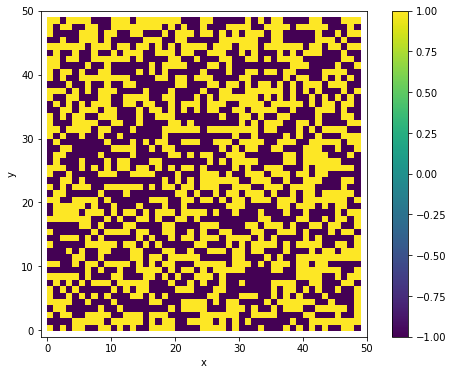

In [ ]:
x = np.arange(0,N)
y = np.arange(0,N)

fig,ax = plt.subplots(figsize=(9,6))
ax.axis('square') # this needs to come before ax.set, otherwise this will change axes from set limits
ax.set(xlim=(-1,N),ylim=(-1,N),xlabel='x',ylabel='y')
ang = ax.pcolormesh(x,y, mat2[-1, :,:],vmin=-1,vmax=1)


ims = []
for i in range(0,t,10):
  angs = mat2[i,:,:]
  im = ax.pcolormesh(x,y,angs,vmin=-1,vmax=1,animated=True)
  if i == 0:
    plt.colorbar(ang)
  ims.append([im])

ang_anim = animation.ArtistAnimation(fig,ims,interval=50,repeat_delay=1000)

In [ ]:
HTML(ang_anim.to_jshtml())

The first plot (T = 0.001) is aligning towards the end of the iterations and has less noise. The second plot (T = 1000) is a lot noiser and has a hard time aligning throughout iterations.

**(b)  It turns out that repeated function calls within ```for``` loops can really affect the efficiency of code. In particular, for this code, repeated calls of the ```randint``` function to choose a random spin  will cause your code to run slower. Make your code faster by modifying the random index generation to outside the for loops.  Similarly, you can further improve your code's performance by moving the modulus function calls outside the ```for``` loops.**

In [ ]:
def Ising2D(N, J, h, T, t):
  # N = number of spins
  # J = coupling
  # h = external field
  # T = temperature
  # t = number of iterations
  spinAngles = 2*nprnd.randint(0,2,size=(N,N))-1
  mat = np.zeros([t, N, N])
  avgMag = np.zeros([t])

  random_i = nprnd.randint(0, N, size = (t, N, N))
  random_j = nprnd.randint(0, N, size = (t, N, N))
  random_t = nprnd.rand(t, N, N)

  low_is = (random_i - 1) % N
  high_is = (random_i + 1) % N

  low_js = (random_j - 1) % N
  high_js = (random_j + 1) % N

  for iter in range(t):
    for k in range(N):
      for l in range(N):
        i = random_i[iter, k, l]
        j = random_j[iter, k, l]

        low_i = low_is[iter, k, l]
        high_i = high_is[iter, k, l]

        low_j = low_js[iter, k, l]
        high_j = high_js[iter, k, l]

        # calculate energy of the current state
        currentSpinAngle = spinAngles[i,j]

        # neighboring spins
        leftSpinAngle = spinAngles[low_i,j]
        rightSpinAngle = spinAngles[high_i,j]
        upSpinAngle = spinAngles[i,low_j]
        downSpinAngle = spinAngles[i,high_j]

        Eij = -J*currentSpinAngle * (leftSpinAngle + rightSpinAngle + upSpinAngle + downSpinAngle) - h*currentSpinAngle

        Eij_flip = -J*(-currentSpinAngle) * (leftSpinAngle + rightSpinAngle + upSpinAngle + downSpinAngle) - h*(-currentSpinAngle)
        
        # calculate the energy difference
        deltaE = Eij_flip - Eij

        # decide whether to flip the spin
        if deltaE < 0:
          spinAngles[i,j] = -currentSpinAngle
        else:
          prob = np.exp(-deltaE/T)
          if random_t[iter, k, l] < prob:
            spinAngles[i,j] = -currentSpinAngle

    mat[iter:, :,:] = spinAngles
    avgMag[iter] = np.abs(np.mean(mat[iter:, :, :]))

  return mat, avgMag

**(c) To get a sense of the average behavior and the variability of outcomes between instantiations, write a function, write a function that will run your Ising code multiple times for the same parameter set, and will output the average magnetization per spin for each iteration and each instantiation. Run your code using the parameters above, with 10 instantiations for each parameter set. Make two plots, one for each parameter set, showing the magnetizations vs time for each instantiation. How different/similar is the behavior between instantiations? Calculate the average of the absolute value of the magnetizations as well as the standard deviations of the magnetizations of the final time step from each instantiation.**



In [ ]:
def test_variability(n, N, J, h, T, t):
  mats = []
  avgMags = []
  sds = []

  abs_mean_mags = []
  std_mags = []

  for n in range(n):
    mat, avgMag = Ising2D(N, J, h, T, t)
    mats.append(mat)
    avgMags.append(avgMag)

    abs_mean_mags.append(np.abs(np.mean(avgMag)))
    std_mags.append(np.std(avgMag))

  return mats, avgMags, abs_mean_mags, std_mags

n = 10
N = 50
J = 1
h = 0
T = 0.001
t = 500

mats, avgMags, abs_mean_mags, std_mags = test_variability(n, N, J, h, T, t)

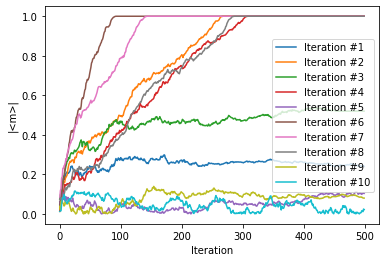

In [ ]:
fig, ax = plt.subplots(1, 1)
time = np.arange(0, t)
for i, avgMag in enumerate(avgMags):
  ax.plot(time, avgMag, label = f"Iteration #{i+1}")

ax.set(xlabel = "Iteration", ylabel = "|<m>|")
ax.legend()
plt.show()

In [ ]:
means = np.abs(np.mean([m[-1] for m in avgMags]))
stds = np.std([m[-1] for m in avgMags])

print(f"Average of the absolute value of the magnetizations: {means}")
print(f"Standard deviations of the magnetizations: {stds}")

Average of the absolute value of the magnetizations: 0.59656
Standard deviations of the magnetizations: 0.42271080232234426


There doesn't appear to be any clear pattern as iteration increases. The average final magnetization was 0.59 and the standard deviation was 0.42. The highest value observed was around 1 for iterations 2, 4, 6, 7, and 8. Iteration 10 had the lowest at approximately 0

**(d) Write a function that will iterate your code in part (c) for multiple temperatures. Your code should keep track of and return the averages and standard deviations that you calculated in part(c) for each temperature. Run this code for the parameters above, iterating through the following temperatures: T = [1,2,2.75,3,3.25,4,5]. Plot the averages and standard deviations as a function of temperature. How does the average magnetization and the standard deviation vary with temperature? Explain why you think this is.**

In [ ]:
T = [1, 2, 2.75, 3, 3.25, 4, 5]
n = 1
N = 50
J = 1
h = 0
t = 500

temps = []

for temp in T:
  temps.append([test_variability(n, N, J, h, temp, t)])

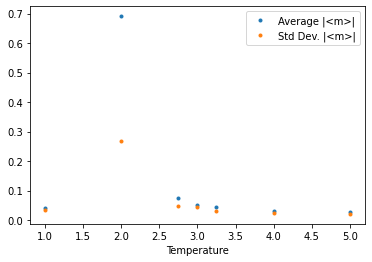

In [ ]:
fig, ax = plt.subplots(1, 1)

y1 = [res[0][2] for res in temps]
y2 = [res[0][3] for res in temps]

ax.plot(T, y1, ".", label="Average |<m>|")
ax.plot(T, y2, ".", label="Std Dev. |<m>|")

ax.set(xlabel = "Temperature")

ax.legend()
plt.show()

As temperature increases, the probability of flipping the spin decreases. Therefore, the system has a harder time aligning thus decreasing the average magnetization and standard deviation of the magnetization.

**(e) Make an animation for a temperature near the large change in behavior (use your plots above to guide your choice). How does this differ from the other videos you made? Given your observations, do you expect system size to affect the behavior of the system? If so, why and how?**

From the plot above, the large change in behavior appears to occur at temperature = 2. I expect system size to have some affect. A higher system size means a higher chance of getting flipped spins, which could produce different results.

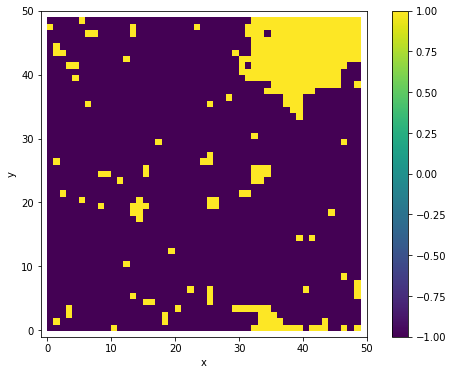

In [ ]:
N = 50
J = 1
h = 0
T = 2
t = 500
matf, am2 = Ising2D(N, J, h, T, t)

x = np.arange(0,N)
y = np.arange(0,N)

fig,ax = plt.subplots(figsize=(9,6))
ax.axis('square') # this needs to come before ax.set, otherwise this will change axes from set limits
ax.set(xlim=(-1,N),ylim=(-1,N),xlabel='x',ylabel='y')
ang = ax.pcolormesh(x,y, matf[-1,:,:],vmin=-1,vmax=1)


ims = []
for i in range(0,t,10):
  angs = matf[i,:,:]
  im = ax.pcolormesh(x,y,angs,vmin=-1,vmax=1,animated=True)
  if i == 0:
    plt.colorbar(ang)
  ims.append([im])

ang_anim = animation.ArtistAnimation(fig,ims,interval=50,repeat_delay=1000)

In [ ]:
HTML(ang_anim.to_jshtml())

As expected from the above output, we can see that the model trys to align, doesn't quite get there. This might be due to the large system size and increased probability of flipping spins. Regardless, we see some alignment compared to the previous animation where T = 1000. 